<a href="https://colab.research.google.com/github/Squirtle007/CUDA_Quantum/blob/main/colab/v0.7.1/cudaq_tutorial_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set up CUDA-Q Environment**

In [1]:
#The following commands are used to set up the environment in Colab
!apt-get -y install cuda-nvtx-11-8 cuda-libraries-11-8
%pip install cuda-quantum==0.7.1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cuda-cudart-11-8 cuda-nvrtc-11-8 cuda-toolkit-11-8-config-common cuda-toolkit-11-config-common
  libcublas-11-8 libcufft-11-8 libcufile-11-8 libcurand-11-8 libcusolver-11-8 libcusparse-11-8
  libnpp-11-8 libnvjpeg-11-8
The following NEW packages will be installed:
  cuda-cudart-11-8 cuda-libraries-11-8 cuda-nvrtc-11-8 cuda-nvtx-11-8
  cuda-toolkit-11-8-config-common cuda-toolkit-11-config-common libcublas-11-8 libcufft-11-8
  libcufile-11-8 libcurand-11-8 libcusolver-11-8 libcusparse-11-8 libnpp-11-8 libnvjpeg-11-8
0 upgraded, 14 newly installed, 0 to remove and 45 not upgraded.
Need to get 674 MB of archives.
After this operation, 2,145 MB of additional disk space will be used.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  cuda-toolkit-11-config-common 11.8.89-1 [16.4 kB]
Get:2 https://developer.down

# Quantum Bits

## Qubit

The fundamental unit of classical information storage, processing and transmission is the bit. Analogously, we define its quantum counterpart, a quantum bit or simply the qubit. Below we define a qubit in CUDA-Q.

In [1]:
import cudaq

# Build a cudaq kernel.


@cudaq.kernel
def kernel():
    # Allocate a single qubit to the kernel.
    qubit = cudaq.qubit()

Classcial bits are transistor elements whose states can be altered to perform computations. Similarly qubits too have physical relizations within superconducting materials, ion-traps and photonic systems. We shall not concern ourselves with specific qubit architectures but rather think of them as systems which obey the laws of quantum mechanics and the mathematical language physicists have developed to describe the theory: linear algebra.

Information storage scales linearly if bits have a single state. Access to multiple states, namely a 0 and a 1 allows for information encoding to scale logarithmically. Similarly we define a qubit to have the states $\ket{0}$ and $\ket{1}$ in Dirac notation where:

$$\ket{0} = \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix}$$
$$\ket{1} = \begin{bmatrix} 0 \\ 1 \\ \end{bmatrix}$$

## Pauli X gate

We can manipulate the state of the qubit via quantum gates. The pauli X gate allows us to flip the state of the qubit:

$$ X \ket{0} = \ket{1} $$

$$ \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ \end{bmatrix} $$

In [2]:
@cudaq.kernel
def kernel():
    # A single qubit initialised to the ground/ zero state.
    qubit = cudaq.qubit()

    # Apply the pauli x gate to the qubit.
    x(qubit)

    # Measurement operator.
    mz(qubit)


# Sample the qubit for 1000 shots to gather statsitics.
result = cudaq.sample(kernel, shots_count=1000)

print(result)

{ 1:1000 }



## Superpositions & Measurements

We have explored the 2 states accessible to us via a qubit. In fact, quantum theory allows one to explore linear combinations of states namely superpositions:

$$  \ket{\psi} = \alpha\ket{0} + \beta\ket{1} $$

where $\alpha$ and $\beta$ $\in \mathbb{C}$. It is important to note that this is still the state of one qubit even though $\ket{\psi}$ has 2 kets.

Quantum theory is probabilistic and hence requires statistical inference to derive observations. Prior to measurement, the state of a qubit is all possible combinations of $\alpha$ and $\beta$ and upon measurement, wavefunction collapse yields either a classical 0 or 1.

The mathematical theory devised to explain quantum phenomena tells us that the probability of observing the qubit in the state $\ket{0}$/ $\ket{1}$ yielding a classical 0/ 1 is $\lvert \alpha \rvert ^2$ / $\lvert \beta \rvert ^2$. The theory has been verified experimentally countless times and we shall verify it once more below.

The hadamard gate allows us to put the qubit in an equal superposition state:

$$ H \ket{0} =  \tfrac{1}{\sqrt{2}} \ket{0} + \tfrac{1}{\sqrt{2}} \ket{1}  \equiv \ket{+}$$

$$\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ \end{bmatrix} + \tfrac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ \end{bmatrix}. $$

The probability of finding the qubit in the 0 / 1 state is hence $\lvert \tfrac{1}{\sqrt{2}} \rvert ^2 = \tfrac{1}{2}$. Lets verify this with some code:

In [3]:
@cudaq.kernel
def kernel():
    # A single qubit initialised to the ground/ zero state.
    qubit = cudaq.qubit()

    # Apply hadamard gate to single qubit to put it in equal superposition.
    h(qubit)

    # Measurement operator.
    mz(qubit)


result = cudaq.sample(kernel, shots_count=1000)

print(result)

{ 0:460 1:540 }



Quantum theory is statistical and statistical accuracy increases with sampling. Above we see how with a 1000 shots, the result 0 / 1 is yielded roughly 50% of the times as predicted by the postulate stated above thus proving the theory.

For completeness:

$$ H \ket{1} =  \tfrac{1}{\sqrt{2}} \ket{0} - \tfrac{1}{\sqrt{2}} \ket{1}  \equiv \ket{-}$$


## Qubit visualizations


What are the possible states our qubit can be in and how can we build up a visual cue to help us make sense of quantum states and their evolution?

We know our qubit can have 2 distinct states: $\ket{0}$ and $\ket{1}$. Maybe we need a 1 dimensional line whose verticies can represent each of the aforementioned states.

We also know that qubits' can be in an equal superposition states: $\ket{+}$ and $\ket{-}$. This now forces us to extend our 1-D line to a 2-D cartesian coordinate system.

Later, we will learn the existence of states that can be represented with $\ket{+i}$ and $\ket{-i}$, this calls for a 3-D extension.

It turns out that a sphere is able to depict all the possible states of a single qubit as shown in figure below:

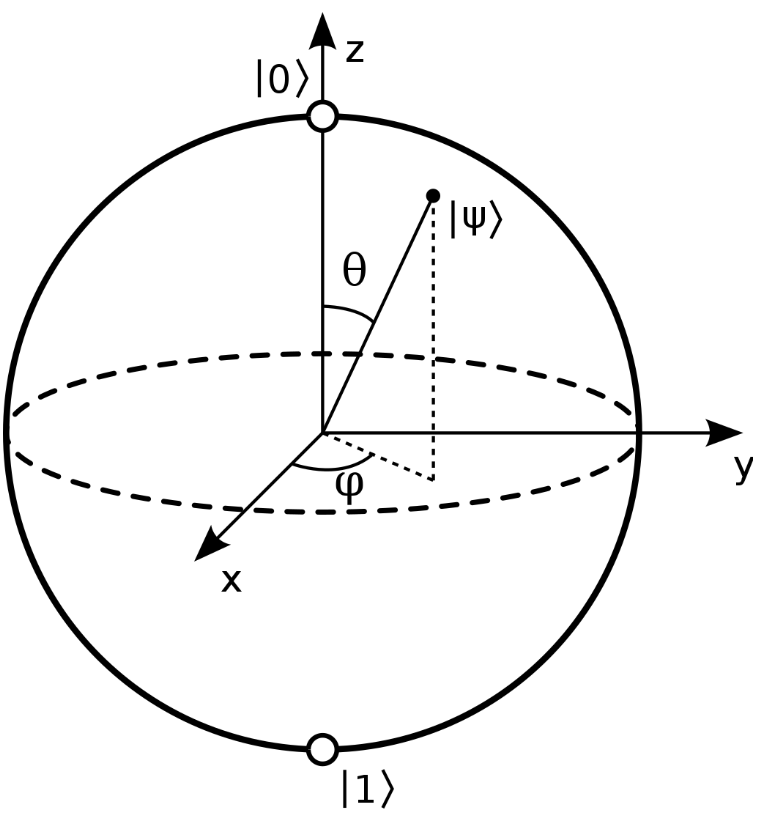

## Gate linearity

Lets manipulate a single qubit:


1. $$  X  \ket{0} = \ket{1}  $$

2. $$  X  \ket{1} = \ket{0}  $$

And more generally, for a qubit in a superposition state, quantum gates act linearly:

 $$   X (\alpha\ket{0} + \beta\ket{1}) = \alpha\ket{1} + \beta\ket{0} $$

It is important to note that states such as $\alpha\ket{0} + \beta\ket{1}$ reference a single qubit in a superposition state. Although we have two kets, they both represent a superposition state of one qubit. We shall explore multiple qubits and their notation in the next chapter.



## Gate unitarity

As we evolve quantum states via quantum gates, the normalization condition requires that the sum of modulus squared of amplitudes must equal 1 at all times:

$$  \ket{\psi} = \alpha\ket{0} + \beta\ket{1},          |\alpha|^2 + |\beta|^2 = 1. $$



This is to adhere to the conservation of probabilities which translates to a constraint on types of quantum gates we can define.

For a general quantum state $\ket{\psi}$, upholding the normalisation condition requires quantum gates to be unitary, that is $U^{\dagger}U = U^{*^{T}}U = \mathbb{I}$.



## Single qubit gates

Below we summarise a few single qubit gates and their effects on quantum states:


$$ X \equiv \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \hspace{1cm} X(\alpha\ket{0} + \beta\ket{1}) = \alpha\ket{1} + \beta\ket{0} \hspace{1cm}  $$

$$ Z \equiv \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}, \hspace{1cm} Z(\alpha\ket{0} + \beta\ket{1}) = \alpha\ket{0} - \beta\ket{1}  $$

$$ H \equiv \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, \hspace{1cm} H(\alpha\ket{0} + \beta\ket{1}) = \alpha\tfrac{\ket{0}+\ket{1}}{\sqrt{2}} + \beta\tfrac{\ket{0}-\ket{1}}{\sqrt{2}}  $$





# Multiple Qubits

If we have 2 classical bits, the possible states we could encode information in would be 00, 01, 10 and 11. Correspondingly, multiple qubits can be combined and the possible combinations of their states used to process information.

A two qubit system has 4 computational basis states: $\ket{00}, \ket{01}, \ket{10}, \ket{11}$.

Classically, we cannot encode information within states such as 00 + 11 but quantum mechanics allows us to write linear superpositions

$$  \ket{\psi} = \alpha_{00}\ket{00} + \alpha_{01}\ket{01} + \alpha_{10}\ket{10} + \alpha_{11}\ket{11}$$

where the probability of measuring $x = 00, 01, 10, 11$ occurs with probability $\lvert \alpha_{x} \rvert ^2$ with the normalization condition that $\sum_{x \in \{ 0,1 \}^2} \lvert  \alpha_{x} \rvert ^2  = 1$

More generally, the quantum state of a $n$ qubit system is written as a sum of $2^n$ possible basis states where the coefficients track the probability of the system collapsing into that state if a measurement is applied.

For $n = 500$, $2^n \approx 10^{150}$ which is greater than the number of atoms in the universe. Storing the complex numbers associated with $2^{500}$ amplitudes would not be feasible using bits and classical computations but nature seems to only require 500 qubits to do so. The art of quantum computation is thus to build quantum systems that we can manipulate with fine precision such that evolving a large statevector can be offloaded onto a quantum computer.



## Some notation conventions

Qubit counting starts from 0 and the 0<sup>th</sup> qubit is represented on the left most side in Dirac notation. For e.g. in $\ket{01}$ the 0<sup>th</sup> qubit is in state $\ket{0}$ and the first in state $\ket{1}$.



For brevity, we denote gate application with subscripts to reference the qubit it acts on. For e.g. $X_{0}\ket{00} = \ket{10}$ refers to $X_{0}$ acting on the 0<sup>th</sup> qubit flipping it to the state 1 as shown. Below we see how this is done in CUDA-Q.

In [4]:
import cudaq


@cudaq.kernel
def kernel():
    # 2 qubits both initialised to the ground/ zero state.
    qvector = cudaq.qvector(2)

    # Application of a flip gate to see ordering notation.
    x(qvector[0])

    mz(qvector[0])
    mz(qvector[1])


print(cudaq.draw(kernel))

result = cudaq.sample(kernel)
print(result)

     ╭───╮
q0 : ┤ x ├
     ╰───╯

{ 10:1000 }



## Controlled-NOT gate

Analogous to classical computing, we now introduce multi-qubit gates to quantum computing.

The controlled-NOT or CNOT gate acts on 2 qubits: the control qubit and the target qubit. Its effect is to flip the target if the control is in the excited $\ket{1}$ state.

We use the notation CNOT<sub>01</sub>$\ket{10} = \ket{11}$ to describe its effects. The subscripts denote that the 0<sup>th</sup> qubit is the control qubit and the 1<sup>st</sup> qubit is the target qubit.

In [5]:
@cudaq.kernel
def kernel():
    # 2 qubits both initialised to the ground/ zero state.
    qvector = cudaq.qvector(2)

    x(qvector[0])

    # Controlled-not gate operation.
    x.ctrl(qvector[0], qvector[1])

    mz(qvector[0])
    mz(qvector[1])


result = cudaq.sample(kernel)
print(result)

{ 11:1000 }



In summary, the CNOT gate in matrix notation is represented as:



$$ CNOT \equiv \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $$

To conserve probabilites and preserve the normalization condition, quantum gates must obey unitarity and one can check that $CNOT^\dagger CNOT = \mathbb{I}$

and its effect on the computational basis states is:

$$ CNOT_{01}\ket{00} = \ket{00} $$
$$ CNOT_{01}\ket{01} = \ket{01} $$
$$ CNOT_{01}\ket{10} = \ket{11} $$
$$ CNOT_{01}\ket{11} = \ket{10} $$



# Executing Quantum Circuits

In CUDA-Q, quantum circuits are stored as quantum kernels. For estimating the probability distribution of a measured quantum state in a circuit, we use the `sample` function call, and for computing the expectation value of a quantum state with a given observable, we use the `observe` function call.

## Sample

Quantum states collapse upon measurement and hence need to be sampled many times to gather statistics. The CUDA-Q `sample` call enables this:



In [6]:
import cudaq

qubit_count = 2

# Define the simulation target.
cudaq.set_target("qpp-cpu")

# Define a quantum kernel function.


@cudaq.kernel
def kernel(qubit_count: int):
    qvector = cudaq.qvector(qubit_count)

    # 2-qubit GHZ state.
    h(qvector[0])
    for i in range(1, qubit_count):
        x.ctrl(qvector[0], qvector[i])

    # If we dont specify measurements, all qubits are measured in
    # the Z-basis by default.
    mz(qvector)


print(cudaq.draw(kernel, qubit_count))

result = cudaq.sample(kernel, qubit_count, shots_count=1000)

print(result)

     ╭───╮     
q0 : ┤ h ├──●──
     ╰───╯╭─┴─╮
q1 : ─────┤ x ├
          ╰───╯

{ 00:498 11:502 }




## Observe

The `observe` function allows us to gather qubit statistics and calculate expectation values. We must supply a spin operator in the form of a Hamiltonian from which we would like to calculate $\bra{\psi}H\ket{\psi}$.

In [7]:
import cudaq
from cudaq import spin

qubit_count = 2

# Define the simulation target.
cudaq.set_target("qpp-cpu")

# Define a quantum kernel function.


@cudaq.kernel
def kernel(qubit_count: int):
    qvector = cudaq.qvector(qubit_count)

    # 2-qubit GHZ state.
    h(qvector[0])
    for i in range(1, qubit_count):
        x.ctrl(qvector[0], qvector[i])


# Define a Hamiltonian in terms of Pauli Spin operators.
hamiltonian = spin.z(0) + spin.y(1) + spin.x(0) * spin.z(0)

# Compute the expectation value given the state prepared by the kernel.
result = cudaq.observe(kernel, hamiltonian, qubit_count).expectation()

print('<H> =', result)

<H> = 0.0


## Noisy Simulation

Quantum noise can be characterized into coherent and incoherent sources of errors that arise during a computation. Coherent noise is commonly due to systematic errors originating from device miscalibrations, for example, gates implementing a rotation $\theta + \epsilon$ instead of $\theta$.

Incoherent noise has its origins in quantum states being entangled with the environment due to decoherence. This leads to mixed states which are probability distributions over pure states and are described by employing the density matrix formalism.

We can model incoherent noise via quantum channels which are linear, completely positive, and trace preserving maps. These maps are called Kraus operators, $\{ K_i \}$, which satisfy the condition $\sum_{i} K_i^\dagger K_i = \mathbb{I}$.

The bit-flip channel flips the qubit with probability $p$ and leaves it unchanged with probability $1-p$. This can be represented by employing Kraus operators:

$$K_0 = \sqrt{1-p} \begin{pmatrix}
    1 & 0 \\
    0 & 1
\end{pmatrix}$$

$$K_1 = \sqrt{p} \begin{pmatrix}
  0 & 1 \\
  1 & 0
\end{pmatrix}$$

Let's implement the **bit-flip** channel as well as **depolarization** channel using CUDA-Q:

In [8]:
import cudaq
from cudaq import spin

import numpy as np

# To model quantum noise, we need to utilize the density matrix simulator target.
cudaq.set_target("density-matrix-cpu")

In [9]:
# Let's define a simple kernel that we will add noise to.
qubit_count = 2


@cudaq.kernel
def kernel(qubit_count: int):
    qvector = cudaq.qvector(qubit_count)
    x(qvector)


print(cudaq.draw(kernel, qubit_count))

     ╭───╮
q0 : ┤ x ├
     ├───┤
q1 : ┤ x ├
     ╰───╯



In [10]:
# In the ideal noiseless case, we get |11> 100% of the time.

ideal_counts = cudaq.sample(kernel, qubit_count, shots_count=1000)
print(ideal_counts)  #ideal_counts.dump()

{ 11:1000 }



In [11]:
# First, we will define an out of the box noise channel. In this case,
# we choose depolarization noise. This depolarization will result in
# the qubit state decaying into a mix of the basis states, |0> and |1>,
# with our provided probability.
error_probability = 0.1
depolarization_channel = cudaq.DepolarizationChannel(error_probability)

# We can also define our own, custom noise channels through
# Kraus operators. Here we will define two operators representing
# bit flip errors.

# Define the Kraus Error Operator as a complex ndarray.
kraus_0 = np.sqrt(1 - error_probability) * np.array([[1.0, 0.0], [0.0, 1.0]],
                                                    dtype=np.complex128)
kraus_1 = np.sqrt(error_probability) * np.array([[0.0, 1.0], [1.0, 0.0]],
                                                dtype=np.complex128)

# Add the Kraus Operator to create a quantum channel.
bitflip_channel = cudaq.KrausChannel([kraus_0, kraus_1])

# Add the two channels to our Noise Model.
noise_model = cudaq.NoiseModel()

# Apply the depolarization channel to any X-gate on the 0th qubit.
noise_model.add_channel("x", [0], depolarization_channel)
# Apply the bitflip channel to any X-gate on the 1st qubit.
noise_model.add_channel("x", [1], bitflip_channel)

# Due to the impact of noise, our measurements will no longer be uniformly
# in the |11> state.
noisy_counts = cudaq.sample(kernel,
                            qubit_count,
                            noise_model=noise_model,
                            shots_count=1000)

print(noisy_counts)  #noisy_counts.dump()

{ 11:865 10:72 01:56 00:7 }



In [12]:
# We can also use noise models with the observe function

hamiltonian = spin.z(0)

noisy_result = cudaq.observe(kernel,
                             hamiltonian,
                             qubit_count,
                             noise_model=noise_model)

noisy_result.expectation()

-0.8666666666666666

Then implement the **phase-flip** channel using CUDA-Q:

In [13]:
import cudaq

# Set the target to our density matrix simulator.
cudaq.set_target('density-matrix-cpu')

# CUDA-Q supports several different models of noise. In this
# case, we will examine the modeling of decoherence of the qubit phase.
# This will occur from "phase flip" errors, wherein the qubit has a
# user-specified probability of undergoing a Z-180 rotation.

# We will begin by defining an empty noise model that we will add
# our phase flip channel to.
noise = cudaq.NoiseModel()

# We define a phase-flip channel setting to `1.0` the probability of the qubit
# undergoing a phase rotation of 180 degrees (π).
phase_flip = cudaq.PhaseFlipChannel(1.0)
# We will apply this channel to any Z gate on the qubit.
# In other words, after each Z gate on qubit 0, there will be a
# probability of `1.0` that the qubit undergoes an extra
# Z rotation.
noise.add_channel('z', [0], phase_flip)


@cudaq.kernel
def kernel():
    # Single qubit initialized to the |0> state.
    qubit = cudaq.qubit()
    # Place qubit in superposition state.
    h(qubit)
    # Rotate the phase around Z by 180 degrees (π).
    z(qubit)
    # Apply another Hadamard and measure.
    h(qubit)
    mz(qubit)


print(cudaq.draw(kernel))

     ╭───╮╭───╮╭───╮
q0 : ┤ h ├┤ z ├┤ h ├
     ╰───╯╰───╯╰───╯



In [14]:
# Without noise, we'd expect the qubit to end in the |1>
# state due to the phase rotation between the two Hadamard
# gates.
noiseless_result = cudaq.sample(kernel)
print(noiseless_result)

{ 1:1000 }



In [15]:
# With noise, our Z-gate will effectively cancel out due
# to the presence of a phase flip error on the gate with a
# probability of `1.0`. This will put us back in the |0> state.
noisy_result = cudaq.sample(kernel, noise_model=noise)
print(noisy_result)

{ 0:1000 }

